In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [2]:
plastic=pd.read_csv("PlasticSales.csv")
plastic

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


<AxesSubplot:>

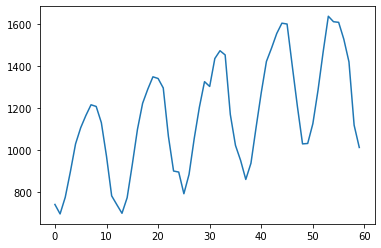

In [3]:
plastic.Sales.plot() 

In [4]:
#Splitting data to test and train
Train = plastic.head(50)
Test = plastic.tail(10) 

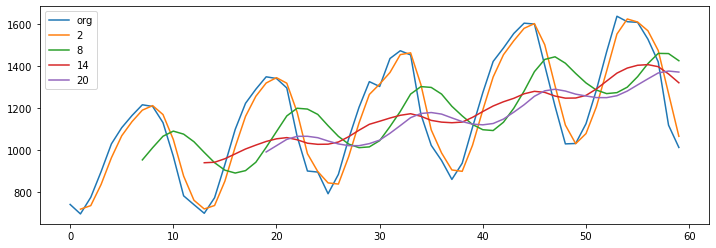

In [5]:
#Moving Average
plt.figure(figsize=(12,4))
plastic.Sales.plot(label="org")
for i in range(2,24,6):
    plastic["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

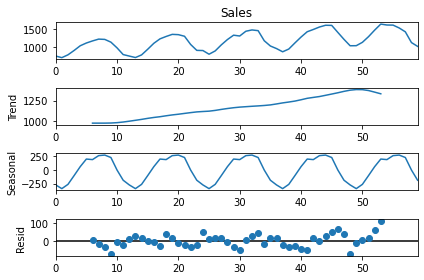

In [6]:
#Time series decomposition plot
decompose_ts_add = seasonal_decompose(plastic.Sales,period=12)
decompose_ts_add.plot()
plt.show() 

In [7]:
#ACF and PACF plots

In [8]:
import statsmodels.graphics.tsaplots as tsa_plots

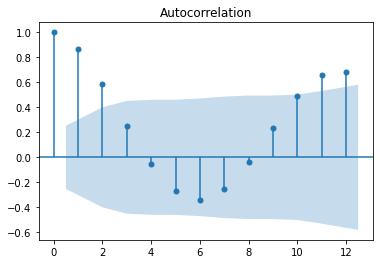

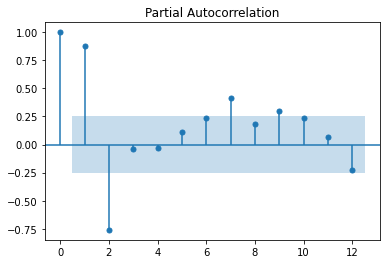

In [9]:
tsa_plots.plot_acf(plastic.Sales,lags=12)
tsa_plots.plot_pacf(plastic.Sales,lags=12)
plt.show() 

In [10]:
#Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)  

In [11]:
#Simple Exponential Method
Train["Sales"] = Train["Sales"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)  

<ipython-input-11-79468fc3f2c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Sales"] = Train["Sales"].astype('double')
C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


16.26571803758636

In [12]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-12-8b6f962a88ff>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


48.303520297636666

In [13]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


9.184917262430243

In [14]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) 

C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


13.592310247130673

In [15]:
#Final model by combining test and train data
plastic["Sales"] = plastic["Sales"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(plastic["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()   

C:\Users\Dr. Nitin\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [17]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)  

60     889.048172
61     818.072784
62     882.427034
63    1012.202253
64    1139.938978
65    1235.230797
66    1231.172248
67    1256.404549
68    1226.727650
69    1158.070466
dtype: float64